In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [3]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape

(3390, 17)

In [5]:
#Target Variable - TenYearCHD

In [6]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# cigsPerDay 
# Max - 70
# mode - 0

# 50% of the values are 0
((df['cigsPerDay'].value_counts()/len(df['cigsPerDay'])) * 100).head()

0.0     50.235988
20.0    17.876106
30.0     5.191740
15.0     5.073746
10.0     3.126844
Name: cigsPerDay, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
# There are null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

## Handling Null values

In [10]:
df1 = df.copy()

In [11]:
# Impute missing values in numerical columns with the median
numerical_columns = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for column in numerical_columns:
    df1[column].fillna(df[column].median(),inplace = True)



In [12]:
# Impute missing values in categorical and binary columns with the mode
categorical_columns = ['education']
binary_columns = ['BPMeds']
for column in categorical_columns + binary_columns:
    df1[column].fillna(df[column].mode()[0], inplace=True)

In [13]:
df1.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
#check if there is any duplicate values

In [15]:
df1.duplicated().sum()

0

### Object dtype = sex, is_smoking

In [16]:
print(df1['sex'].value_counts())
print(df1['is_smoking'].value_counts())

F    1923
M    1467
Name: sex, dtype: int64
NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [17]:
#encode these values
df1['sex'] = df1['sex'].apply(lambda x: 1 if x == 'F' else 0)
df1['is_smoking'] = df1['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

print(df1['sex'].value_counts())
print(df1['is_smoking'].value_counts())

1    1923
0    1467
Name: sex, dtype: int64
0    1703
1    1687
Name: is_smoking, dtype: int64


In [18]:
################## Encoding done ############################

## Outliers

id


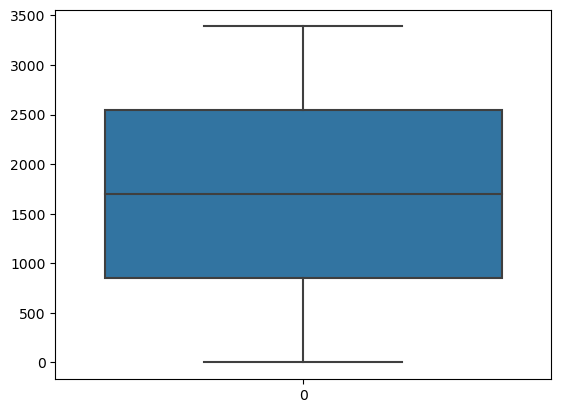

age


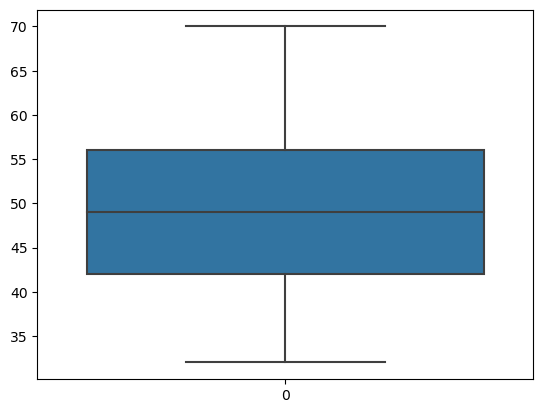

education


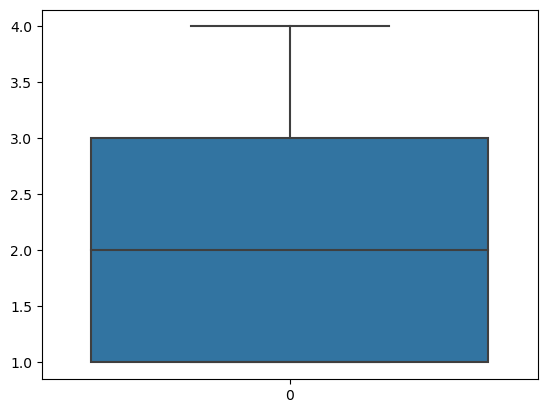

sex


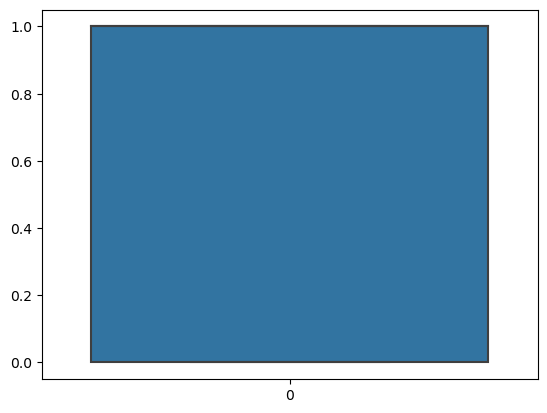

is_smoking


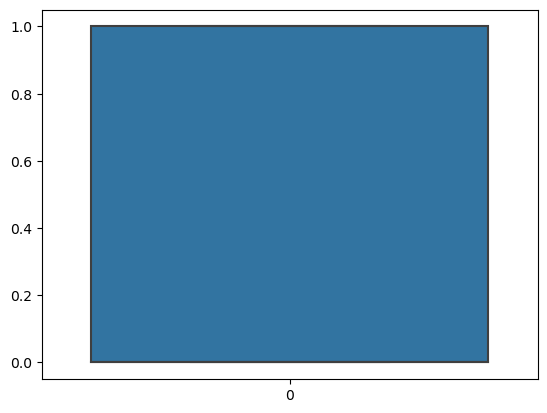

cigsPerDay


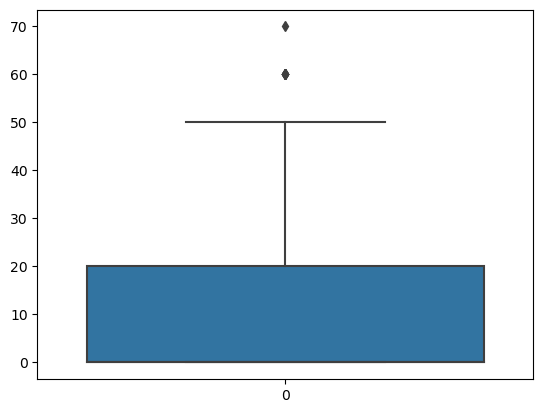

BPMeds


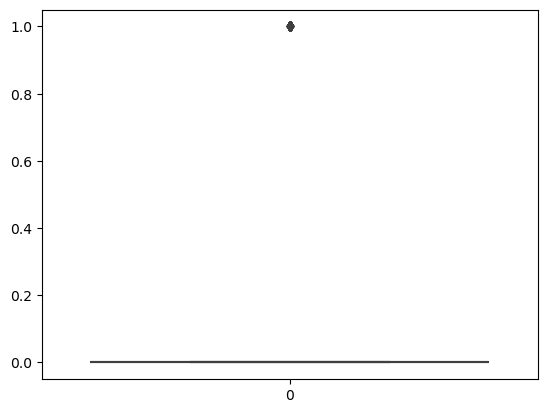

prevalentStroke


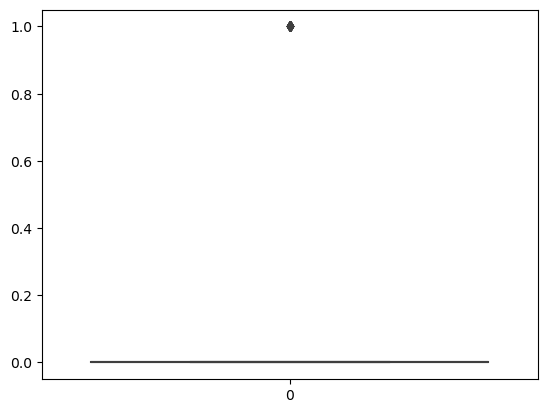

prevalentHyp


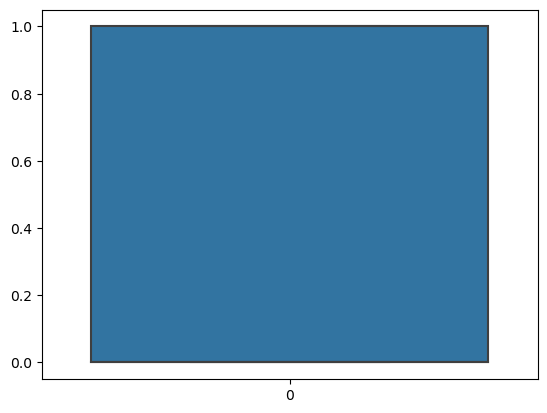

diabetes


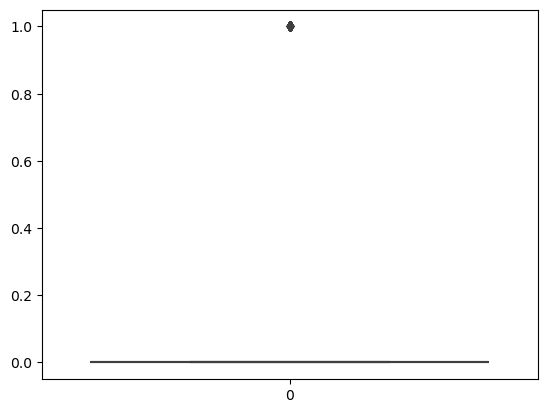

totChol


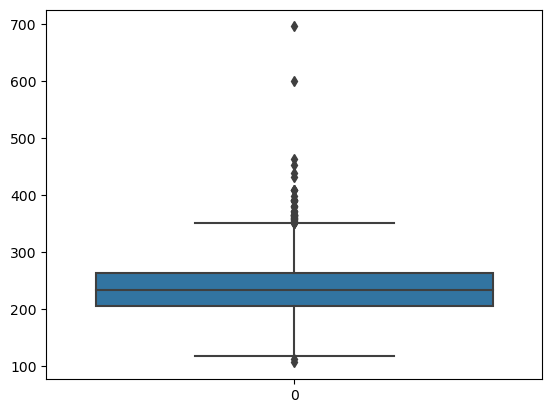

sysBP


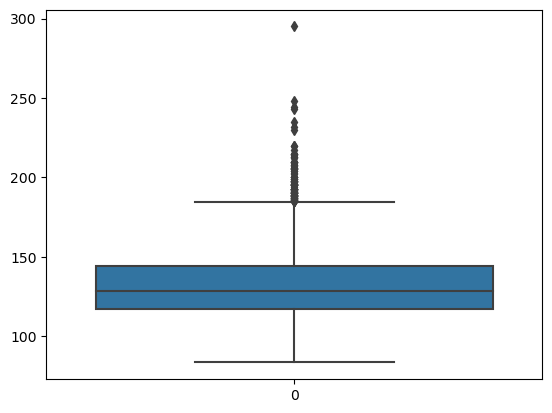

diaBP


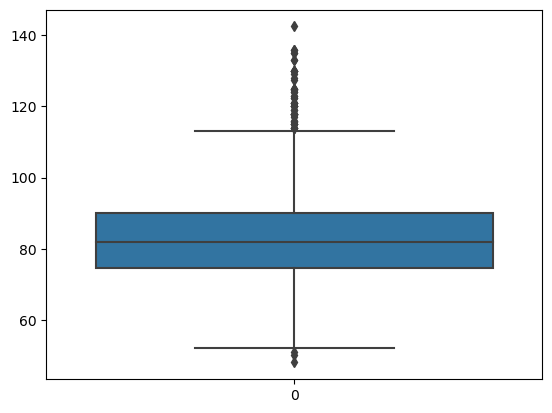

BMI


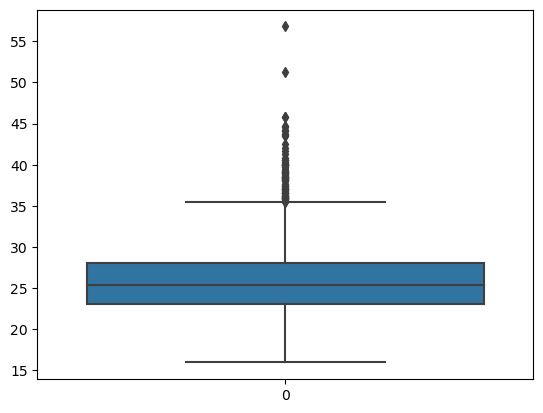

heartRate


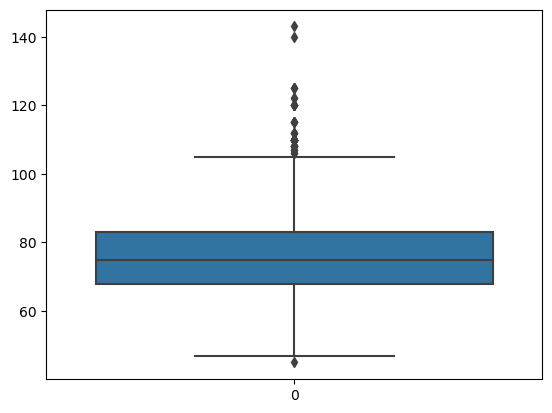

glucose


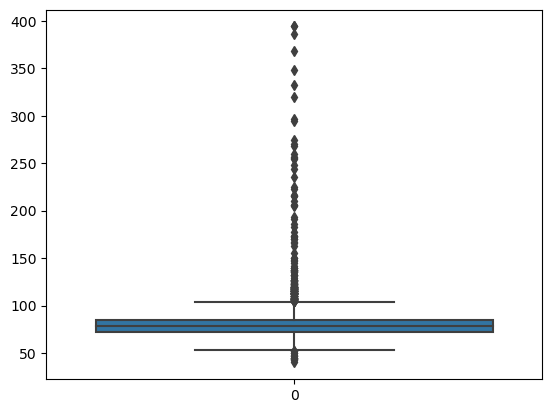

TenYearCHD


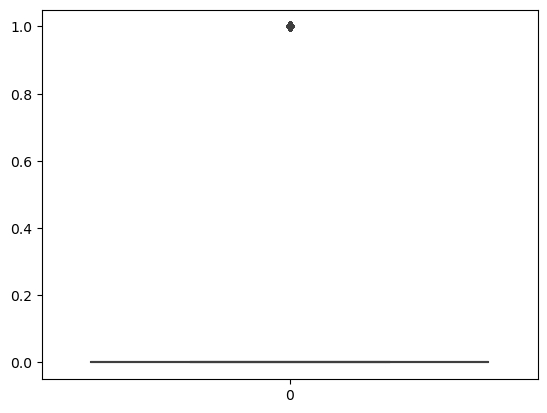

In [19]:
# Check Outliers
def boxplot(columns,dataframe):
    sns.boxplot(dataframe[columns])
    plt.show()
for i in list(df1.columns):
    print(i)
    boxplot(i,df1)

In [20]:
#### Outliers found -------- > totChol, sysBP, diaBP, BMI, heartRate, glucose

In [21]:
df2 = df1.copy()

In [22]:
for i in ['sysBP', 'diaBP', 'glucose','totChol','heartRate','BMI']:   
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3-q1
    positive_out = q3 + 1.5*iqr
    negative_out = q1 - 1.5*iqr

    df2 = df2[~((df2[i] >= positive_out)| (df2[i] <= negative_out))]

In [23]:
df1.shape,df2.shape

((3390, 17), (2903, 17))

sysBP


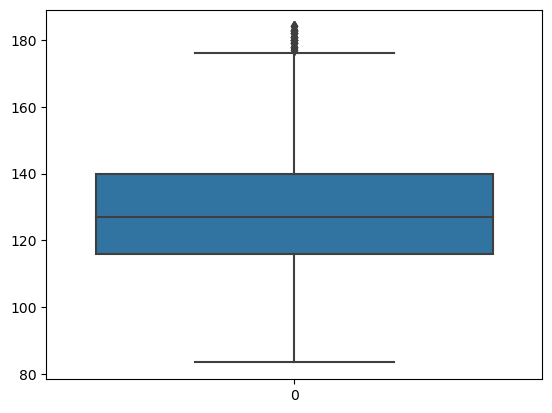

diaBP


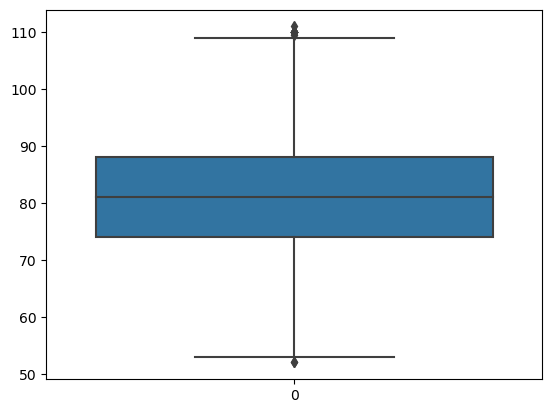

glucose


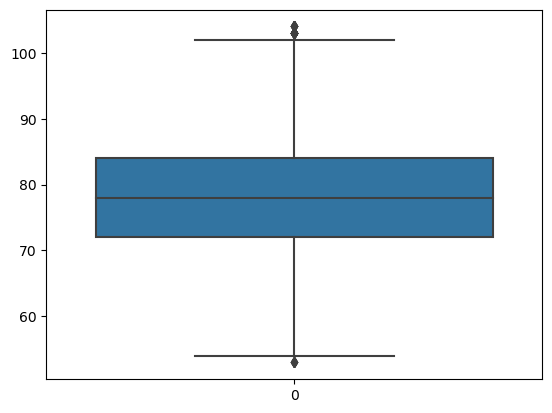

totChol


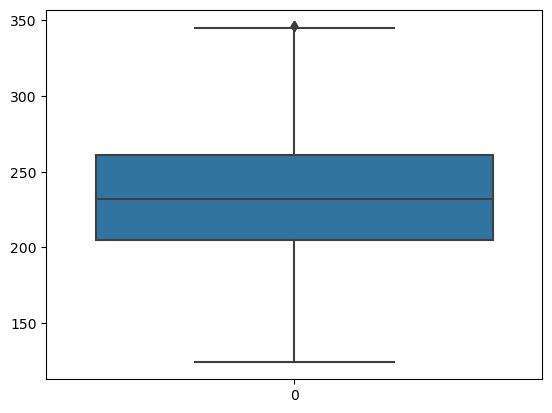

heartRate


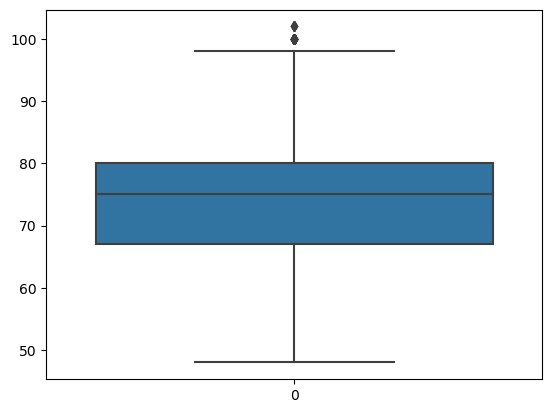

BMI


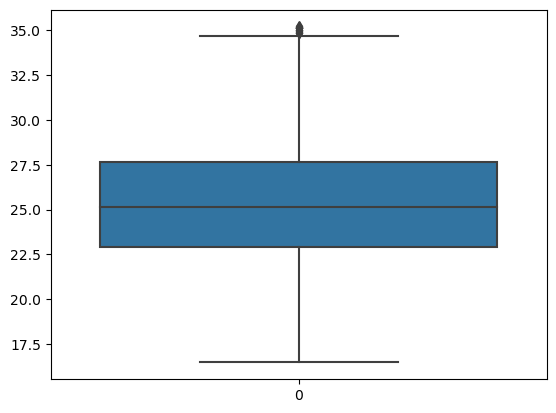

In [24]:
# Check Outliers
x = ['sysBP', 'diaBP', 'glucose','totChol','heartRate','BMI']

for i in x:
    print(i)
    boxplot(i,df2)

In [25]:
################# Outliers done ###################

## Removing some columns

In [26]:
columns = ['diabetes','BPMeds','prevalentStroke']
for i in columns:
    print((df2[i].value_counts()/df2[i].shape[0])*100)

0    99.483293
1     0.516707
Name: diabetes, dtype: float64
0.0    97.933173
1.0     2.066827
Name: BPMeds, dtype: float64
0    99.448846
1     0.551154
Name: prevalentStroke, dtype: float64


In [27]:
# As you can see these 3 columns have 99% values as 0, lets remove them

In [28]:
df2.drop(columns = ['diabetes','BPMeds','prevalentStroke'],inplace = True)

In [29]:
# Dropping id column
df2.drop(columns = ['id'],inplace = True)

# ********************************************


# EDA

In [29]:
# Age groups
# 32-41: Ages 32 to 41
# 42-51: Ages 42 to 51
# 52-61: Ages 52 to 61
# 62-70: Ages 62 to 70
new_age = df1.copy()

In [68]:
def age(x):
    if x >= 32 and x <= 41:
        return '32-41'
    elif x >= 42 and x <= 51:
        return '42-51'
    elif x >= 52 and x <= 61:
        return '52-61'
    elif x >= 62 and x <= 70:
        return '62-70'

new_age['age_bracket'] = new_age['age'].apply(age)

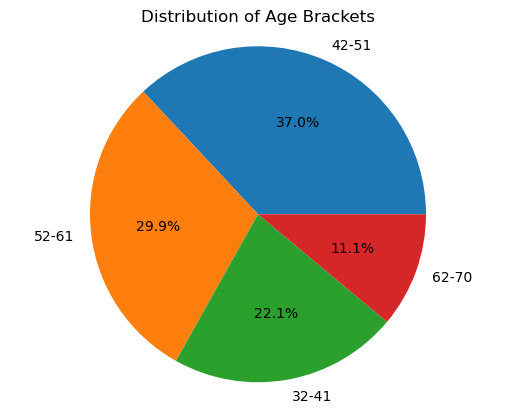

In [93]:
age_counts = new_age['age_bracket'].value_counts()
labels = age_counts.index
counts = age_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Age Brackets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

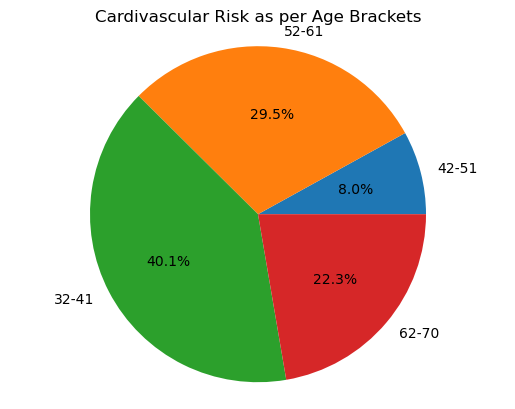

In [116]:
age_counts = new_age['age_bracket'].value_counts()
labels = age_counts.index
counts = age_counts.values

plt.pie(new_age.groupby('age_bracket')['TenYearCHD'].value_counts().unstack().loc[:,1], 
        labels=labels, autopct='%1.1f%%')
plt.title('Cardivascular Risk as per Age Brackets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Most of the data is for Age group (42-51), and as it turns out they are least risk adverse for the cardivascular disease

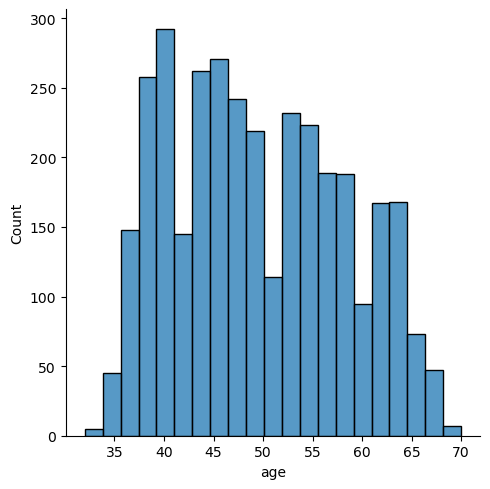

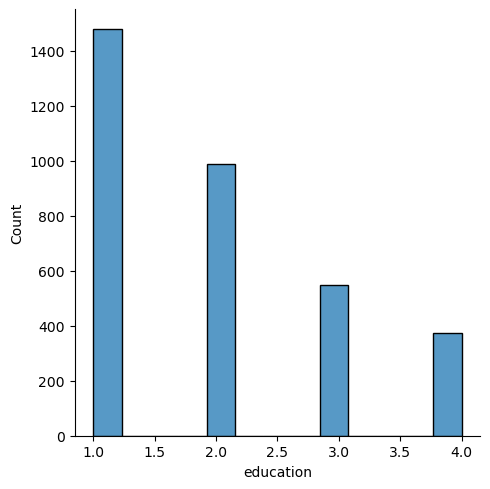

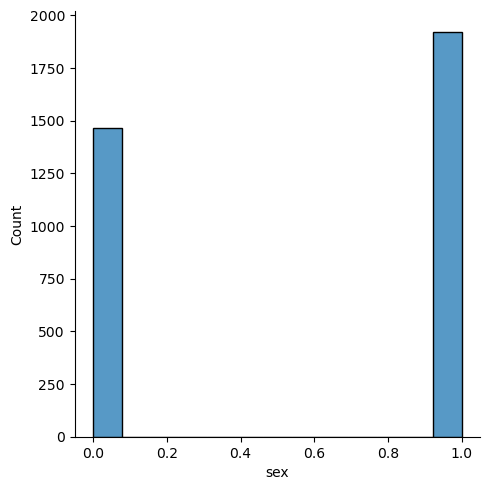

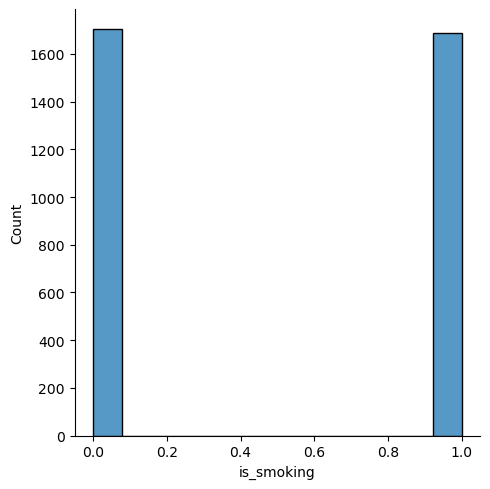

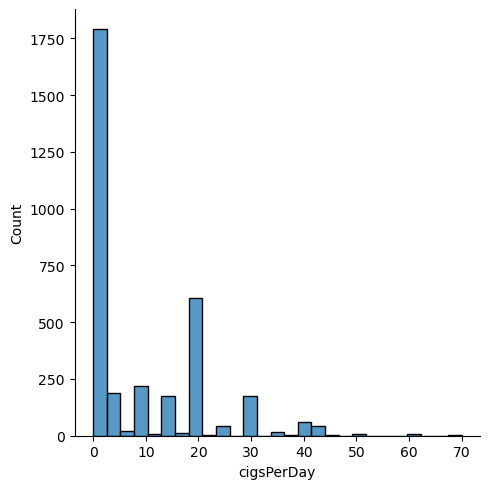

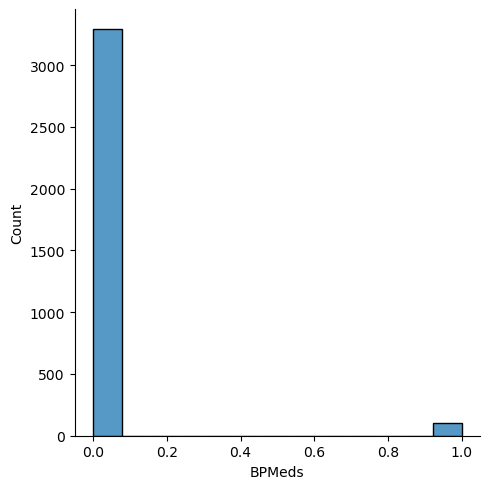

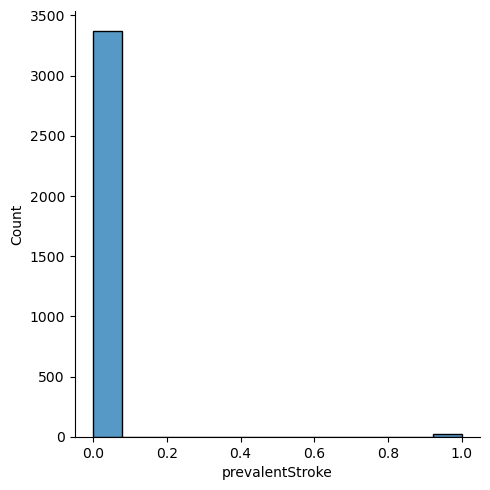

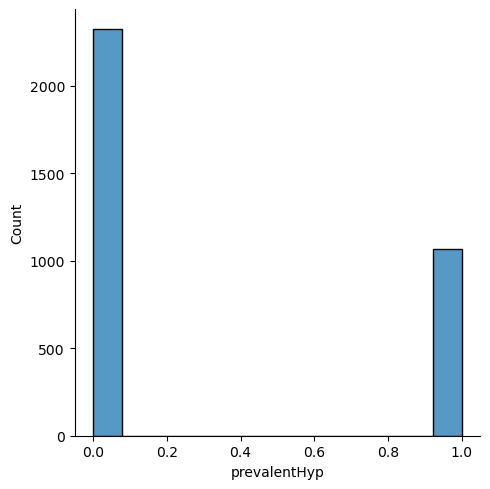

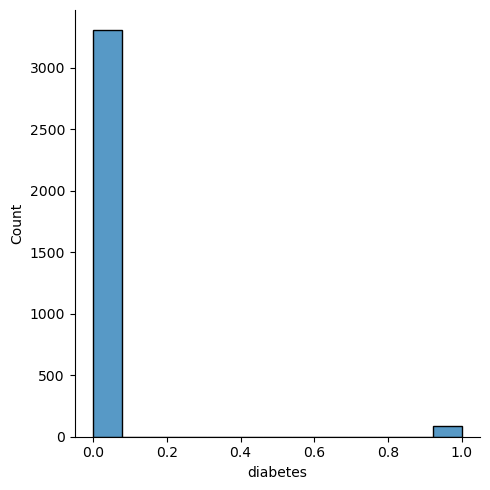

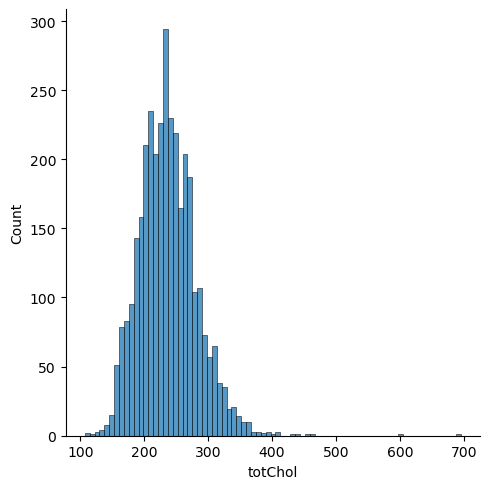

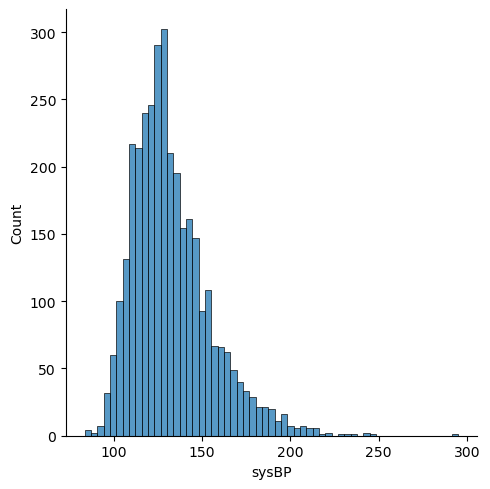

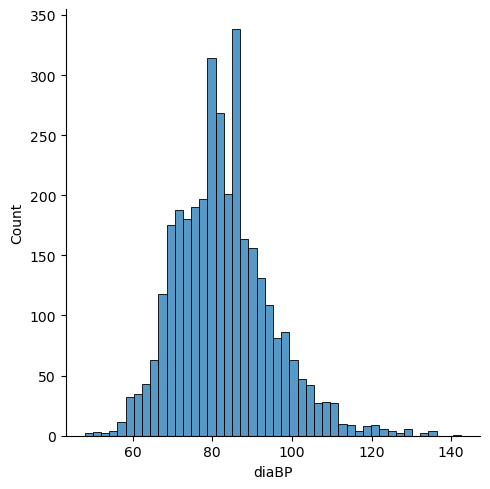

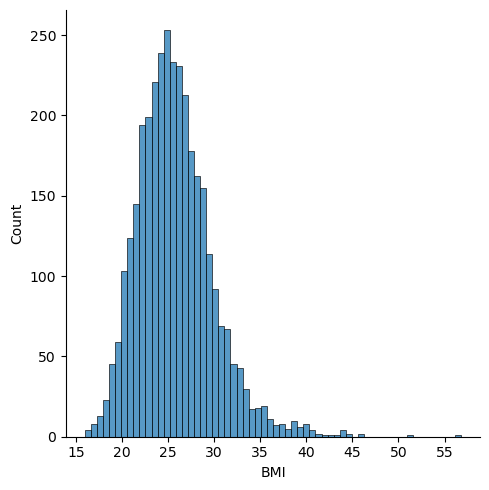

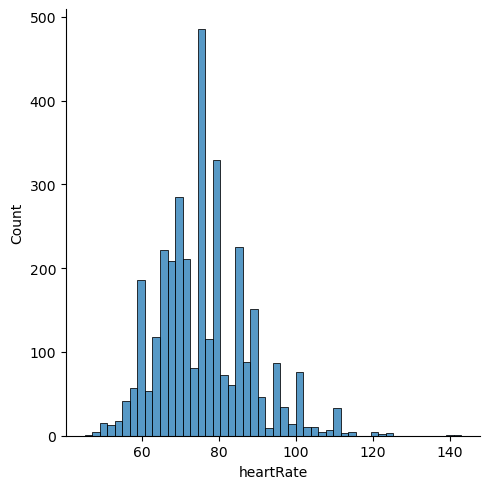

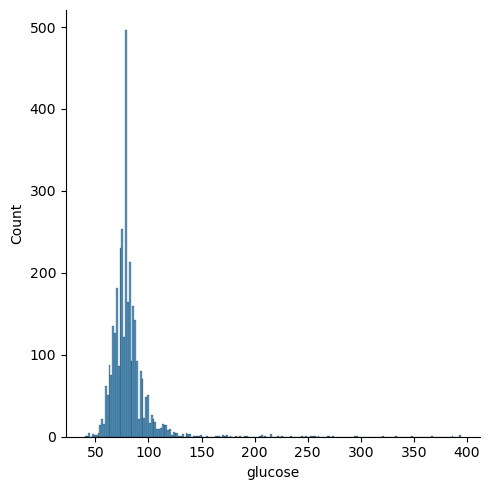

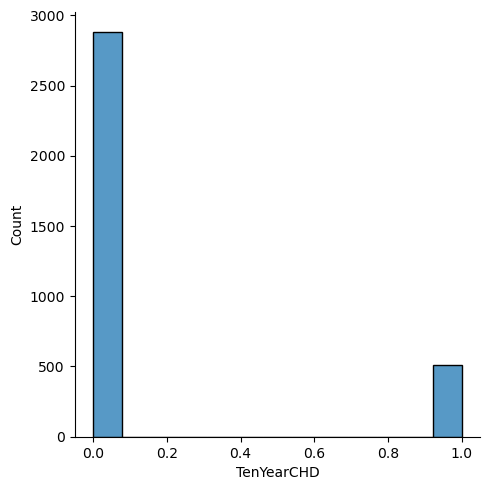

In [139]:
#Distribution of columns

for i in range(1,len(df1.columns)):
    sns.displot(df1.iloc[:,i])
    plt.show()

In [ ]:
#Imbalanced dataset
# diabetes,prevalentSTroke, BPMeds have 90% or more 0 values

<Axes: xlabel='is_smoking', ylabel='TenYearCHD'>

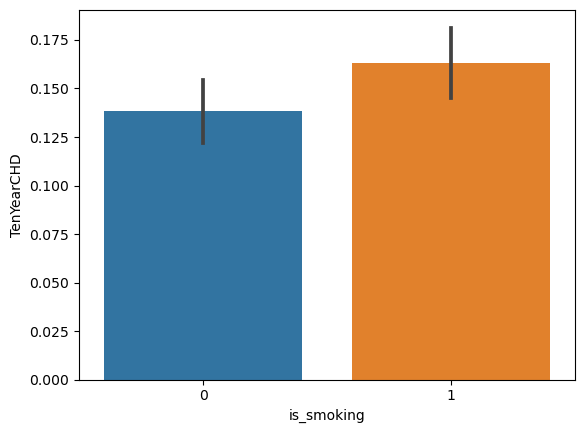

In [140]:
sns.barplot(x = new_age['is_smoking'],y = new_age['TenYearCHD'])

<Axes: xlabel='sex', ylabel='TenYearCHD'>

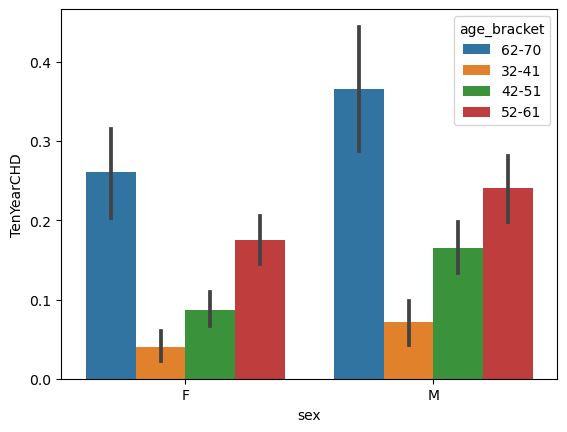

In [143]:
sns.barplot(x = df['sex'],y = new_age['TenYearCHD'],hue = new_age['age_bracket'])

In [147]:
new_age['edu'] = new_age['education'].apply(lambda x: "Doctorate or PhD" if x == 4 else "Post Graduate" \
                                            if x == 3 else "Graduate" if x == 2 else "Higher Secondary" \
                                            if x == 1 else "Unknown")
new_age['edu'].value_counts()

Higher Secondary    1478
Graduate             990
Post Graduate        549
Doctorate or PhD     373
Name: edu, dtype: int64

<Axes: xlabel='edu', ylabel='TenYearCHD'>

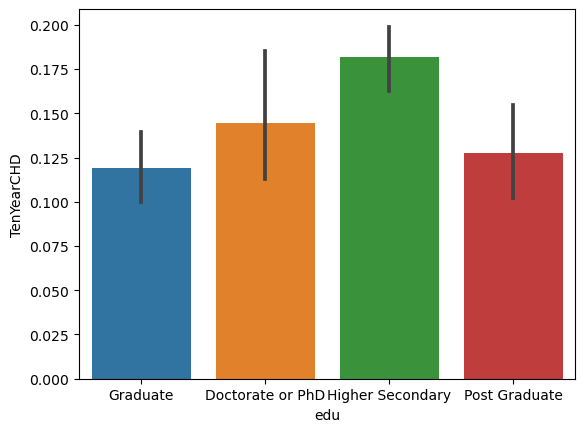

In [149]:
sns.barplot(x = new_age['edu'],y = new_age['TenYearCHD'])

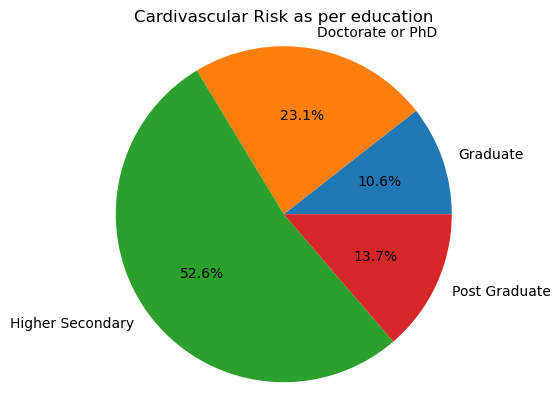

In [176]:
plt.title('Cardivascular Risk as per education')
plt.pie(new_age.groupby('edu')['TenYearCHD'].value_counts().unstack().iloc[:,1],
        labels = new_age['edu'].unique(),
        autopct='%1.1f%%')
plt.axis('equal')  

plt.show()


<Axes: xlabel='is_smoking', ylabel='diabetes'>

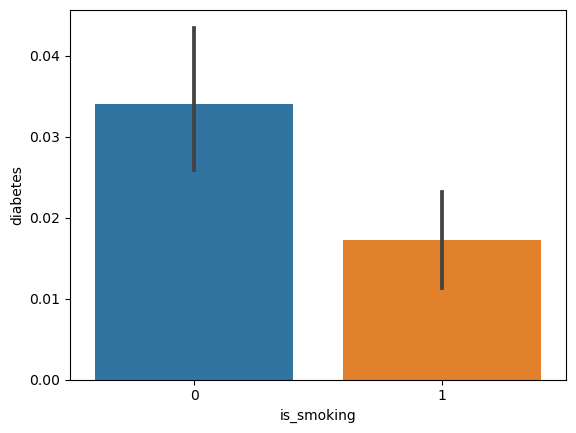

In [177]:
sns.barplot(x = new_age['is_smoking'], y = new_age['diabetes'])

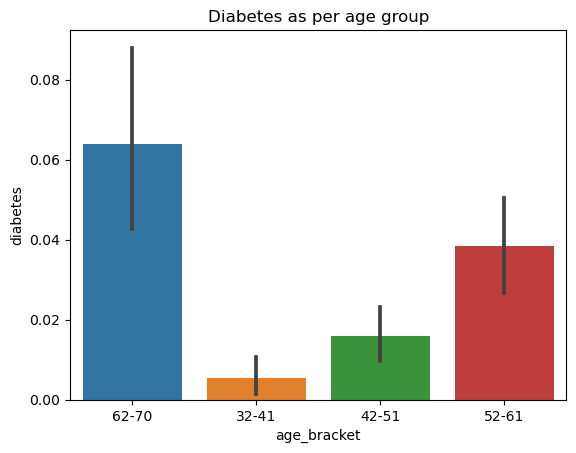

In [181]:
sns.barplot(x = new_age['age_bracket'], y = new_age['diabetes'])
plt.title('Diabetes as per age group')
plt.show()

In [ ]:
# Key Findings
# -- Interestingly two extremes are more likely for the risk of cardiovascular disease i.e. Non Smoker and Heavy Smoker
# -- Your Educational Background also determines your risk for Cardiovascular Disease, 
#    least educated you are, more risk for cardiovascular disease
# -- As per this data, old age people are most likely to have cardio vascular disease
# -- People who have risk for cardiovascular disease smokes an average of 11 cigarettes


# ********************************************

## Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(df2.drop(columns = ['TenYearCHD']))

In [31]:
df3 = pd.DataFrame(df3,columns = df2.drop(columns = ['TenYearCHD']).columns)
df3.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.768237,0.023329,0.896787,0.983261,-0.526704,-0.604545,-0.321096,1.042454,0.343700,0.001678,1.438733,0.215627
1,-1.531335,1.986364,-1.115092,-1.017024,-0.776681,1.654136,-0.544357,2.144731,1.589046,1.260798,-0.257633,-0.292874
2,-0.352917,-0.958188,0.896787,0.983261,0.056574,-0.604545,0.398302,-0.721188,-0.997442,-1.441005,1.250248,1.639429
3,0.118451,-0.958188,-1.115092,0.983261,0.889829,1.654136,-0.023414,1.593593,0.631088,0.827707,-0.634603,1.639429
4,1.768237,-0.958188,0.896787,0.983261,1.723084,-0.604545,0.175040,0.408645,0.343700,0.299966,-0.446118,-0.089474


## Scenario 1

### Balancing the [whole] dataset and and spliting into train_test_split

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x, y = ros.fit_resample(df3, df2['TenYearCHD'])

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resam,y_resam = smote.fit_resample(df3, df2['TenYearCHD'])

In [66]:
# Splitting

In [33]:
from sklearn.model_selection import train_test_split
xTrain,xTest, yTrain, yTest = train_test_split(x, y,test_size = 0.25, stratify=y)

# **************************************************------***************************

## Scenario 2 / Real world Scenario

### Balancing only [training] dataset 

In [42]:
x = df3.copy()
y = df2['TenYearCHD'].copy()
from sklearn.model_selection import train_test_split
xTrain,xTest, yTrain, yTest = train_test_split(x, y,test_size = 0.25, stratify=y)

In [43]:
yTrain.value_counts()

0    1887
1     290
Name: TenYearCHD, dtype: int64

In [44]:
yTest.value_counts()

0    629
1     97
Name: TenYearCHD, dtype: int64

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
xTrain, yTrain = ros.fit_resample(xTrain, yTrain)

In [46]:
yTrain.value_counts()

0    1887
1    1887
Name: TenYearCHD, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
xTrain, yTrain = smote.fit_resample(xTrain, yTrain)

# **************************************************------***************************

## Model Building

# Scenario 1

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score
dt = DecisionTreeClassifier()
model = dt.fit(xTrain, yTrain)


test_recall_acc = recall_score(model.predict(xTest),yTest)
train_recall_acc = recall_score(model.predict(xTrain),yTrain)

test__acc = accuracy_score(model.predict(xTest),yTest)
train__acc = accuracy_score(model.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 1.0
Test 0.924483306836248
Recall Score
 Train 1.0
Test 0.8708333333333333


In [ ]:
## OverFitting

In [81]:
yTest.value_counts()

1    629
0    629
Name: TenYearCHD, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(model.predict(xTest),yTest)

array([[536,   2],
       [ 93, 627]], dtype=int64)

In [70]:
print('Test')
print(classification_report(model.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       504
           1       1.00      0.83      0.91       754

    accuracy                           0.90      1258
   macro avg       0.90      0.92      0.90      1258
weighted avg       0.92      0.90      0.90      1258



### Random Forest

In [36]:
## Simple balance the data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rf = RandomForestClassifier()
model = rf.fit(xTrain, yTrain)


test_recall_acc = recall_score(model.predict(xTest),yTest)
train_recall_acc = recall_score(model.predict(xTrain),yTrain)

test__acc = accuracy_score(model.predict(xTest),yTest)
train__acc = accuracy_score(model.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 1.0
Test 0.980127186009539
Recall Score
 Train 1.0
Test 0.9646153846153847


In [37]:
yTest.value_counts()

1    629
0    629
Name: TenYearCHD, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(model.predict(xTest),yTest)

array([[606,   2],
       [ 23, 627]], dtype=int64)

In [39]:
print('Test')
print(classification_report(model.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       608
           1       1.00      0.96      0.98       650

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



In [40]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds  = roc_curve(yTest,model.predict(xTest))

auc1 = auc(fpr,tpr)
print('AUC', auc1)

print('fpr', fpr)
print('tpr', tpr)
print('thresholds', thresholds)

AUC 0.9801271860095391
fpr [0.         0.03656598 1.        ]
tpr [0.         0.99682035 1.        ]
thresholds [2 1 0]


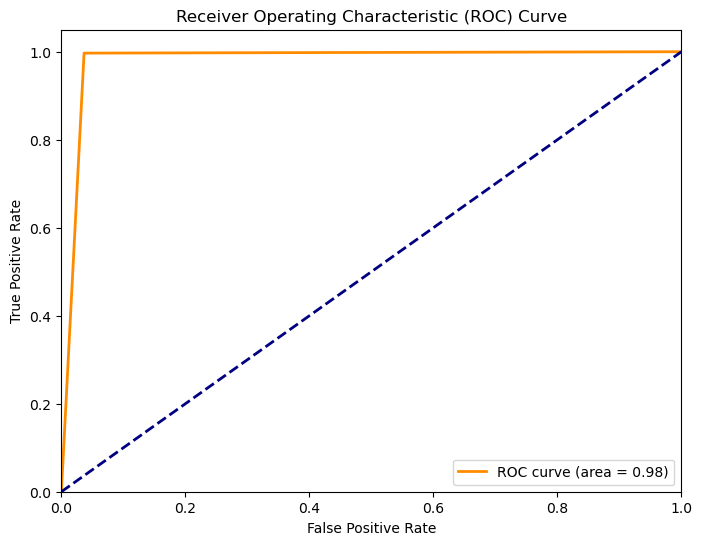

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2,  label='ROC curve (area = {:.2f})'.format(auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors =2)
md1 = knn.fit(xTrain,yTrain)
test_recall_acc = recall_score(md1.predict(xTest),yTest)
train_recall_acc = recall_score(md1.predict(xTrain),yTrain)

test__acc = accuracy_score(md1.predict(xTest),yTest)
train__acc = accuracy_score(md1.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 0.9965553789083201
Test 0.9117647058823529
Recall Score
 Train 1.0
Test 0.8753623188405797


In [76]:
# Overfitting

In [77]:
yTest.value_counts()

1    629
0    629
Name: TenYearCHD, dtype: int64

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(md1.predict(xTest),yTest)

array([[543,  25],
       [ 86, 604]], dtype=int64)

In [79]:
print('Test')
print(classification_report(md1.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       568
           1       0.96      0.88      0.92       690

    accuracy                           0.91      1258
   macro avg       0.91      0.92      0.91      1258
weighted avg       0.92      0.91      0.91      1258



# *****************************************-*--------****************************

# Scenario 2

## Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score
dt = DecisionTreeClassifier()
model = dt.fit(xTrain, yTrain)


test_recall_acc = recall_score(model.predict(xTest),yTest)
train_recall_acc = recall_score(model.predict(xTrain),yTrain)

test__acc = accuracy_score(model.predict(xTest),yTest)
train__acc = accuracy_score(model.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 1.0
Test 0.7699724517906336
Recall Score
 Train 1.0
Test 0.16981132075471697


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(model.predict(xTest),yTest)

array([[541,  79],
       [ 88,  18]], dtype=int64)

In [49]:
print('Test')
print(classification_report(model.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       620
           1       0.19      0.17      0.18       106

    accuracy                           0.77       726
   macro avg       0.52      0.52      0.52       726
weighted avg       0.76      0.77      0.77       726



## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rf = RandomForestClassifier(random_state = 3)
model = rf.fit(xTrain, yTrain)


test_recall_acc = recall_score(model.predict(xTest),yTest)
train_recall_acc = recall_score(model.predict(xTrain),yTrain)

test__acc = accuracy_score(model.predict(xTest),yTest)
train__acc = accuracy_score(model.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 1.0
Test 0.8581267217630854
Recall Score
 Train 1.0
Test 0.375


In [66]:
yTest.value_counts()

0    629
1     97
Name: TenYearCHD, dtype: int64

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(model.predict(xTest),yTest)

array([[614,  88],
       [ 15,   9]], dtype=int64)

In [68]:
print('Test')
print(classification_report(model.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       702
           1       0.09      0.38      0.15        24

    accuracy                           0.86       726
   macro avg       0.53      0.62      0.54       726
weighted avg       0.95      0.86      0.90       726



In [69]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds  = roc_curve(yTest,model.predict(xTest))

auc1 = auc(fpr,tpr)
print('AUC', auc1)

print('fpr', fpr)
print('tpr', tpr)
print('thresholds', thresholds)

AUC 0.534468064183043
fpr [0.         0.02384738 1.        ]
tpr [0.         0.09278351 1.        ]
thresholds [2 1 0]


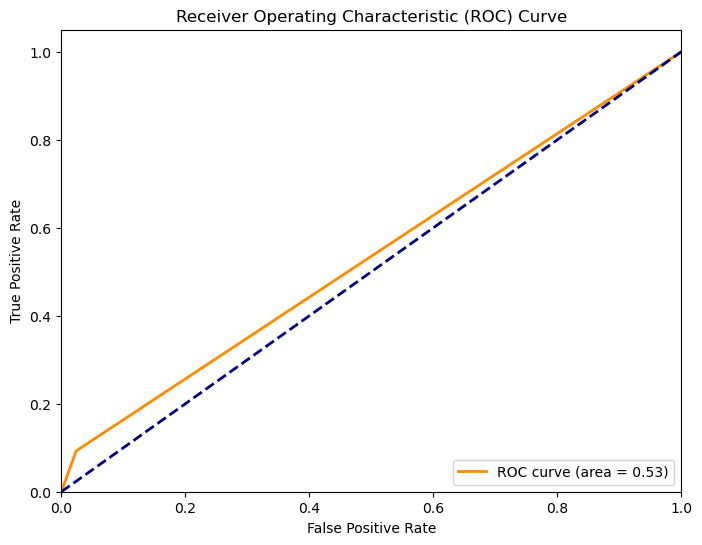

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2,  label='ROC curve (area = {:.2f})'.format(auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors =2)
md1 = knn.fit(xTrain,yTrain)
test_recall_acc = recall_score(md1.predict(xTest),yTest)
train_recall_acc = recall_score(md1.predict(xTrain),yTrain)

test__acc = accuracy_score(md1.predict(xTest),yTest)
train__acc = accuracy_score(md1.predict(xTrain),yTrain)

print('Accuracy SCore\n Train', train__acc)
print('Test', test__acc)

print('Recall Score\n Train', train_recall_acc)
print('Test', test_recall_acc)

Accuracy SCore
 Train 0.8897565457050988
Test 0.8581267217630854
Recall Score
 Train 1.0
Test 0.25


In [93]:
yTest.value_counts()

0    629
1     97
Name: TenYearCHD, dtype: int64

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(md1.predict(xTest),yTest)

array([[620,  94],
       [  9,   3]], dtype=int64)

In [95]:
print('Test')
print(classification_report(md1.predict(xTest),yTest))

Test
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       714
           1       0.03      0.25      0.06        12

    accuracy                           0.86       726
   macro avg       0.51      0.56      0.49       726
weighted avg       0.97      0.86      0.91       726

